In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns', None)

In [32]:
frequency = pd.read_csv('frequency_dataset.csv', encoding='utf-8')
print(frequency.shape)
print(frequency.columns)
print(frequency.isna().sum())
frequency.head()

(235133, 8)
Index(['POLICY_NO', 'DATE OF \r\nACCIDENT', 'AGE', 'REG', 'DRV_DLI_AGE',
       'BODY', 'MAKE', 'VEH_SEATS'],
      dtype='object')
POLICY_NO                    0
DATE OF \r\nACCIDENT    176669
AGE                      12042
REG                          0
DRV_DLI_AGE              11976
BODY                         0
MAKE                         0
VEH_SEATS                    0
dtype: int64


,POLICY_NO,DATE OF \r\nACCIDENT,AGE,REG,DRV_DLI_AGE,BODY,MAKE,VEH_SEATS
0,102048936,2015-03-11,26.0,DUBAI,8.022349,SALOON,TOYOTA,4.0
1,102048936,2015-06-15,31.0,DUBAI,8.292969,SALOON,TOYOTA,4.0
2,102048936,2015-03-11,26.0,DUBAI,8.022349,SALOON,TOYOTA,4.0
3,102048936,2015-03-11,26.0,DUBAI,8.022349,SALOON,TOYOTA,4.0
4,101509203,NaN,NaN,DUBAI,NaN,PICK UP,MITSUBISHI,2.0


In [33]:

frequency.drop_duplicates(
    subset=['POLICY_NO', 'DATE OF \r\nACCIDENT'], inplace=True)
frequency['freq'] = frequency.groupby(
    'POLICY_NO')['DATE OF \r\nACCIDENT'].transform('count')

frequency.drop_duplicates(subset=['POLICY_NO'], inplace=True)
frequency

,POLICY_NO,DATE OF \r\nACCIDENT,AGE,REG,DRV_DLI_AGE,BODY,MAKE,VEH_SEATS,freq
0,102048936,2015-03-11,26.0,DUBAI,8.022349,SALOON,TOYOTA,4.0,2
4,101509203,NaN,NaN,DUBAI,NaN,PICK UP,MITSUBISHI,2.0,0
5,101509204,NaN,NaN,DUBAI,NaN,SALOON,TOYOTA,4.0,0
6,102048937,2015-05-24,50.0,DUBAI,17.602834,VAN,HYUNDAI,8.0,1
7,102048938,2015-03-02,26.0,DUBAI,8.022349,SALOON,MITSUBISHI,4.0,1
...,...,...,...,...,...,...,...,...,...
235128,102153585,NaN,42.0,ABU DHABI,14.592745,SUV,PEUGEOT,4.0,0
235129,102153586,NaN,69.0,DUBAI,37.264887,SALOON,BMW,4.0,0
235130,102153588,NaN,35.0,DUBAI,7.624914,SALOON,CHEVROLET,4.0,0
235131,102153587,NaN,48.0,ABU DHABI,3.137577,SALOON,TOYOTA,4.0,0


In [34]:
# drop policy no and date of accident
frequency.drop(['POLICY_NO', 'DATE OF \r\nACCIDENT'], axis=1, inplace=True)
frequency.head()

,AGE,REG,DRV_DLI_AGE,BODY,MAKE,VEH_SEATS,freq
0,26.0,DUBAI,8.022349,SALOON,TOYOTA,4.0,2
4,NaN,DUBAI,NaN,PICK UP,MITSUBISHI,2.0,0
5,NaN,DUBAI,NaN,SALOON,TOYOTA,4.0,0
6,50.0,DUBAI,17.602834,VAN,HYUNDAI,8.0,1
7,26.0,DUBAI,8.022349,SALOON,MITSUBISHI,4.0,1


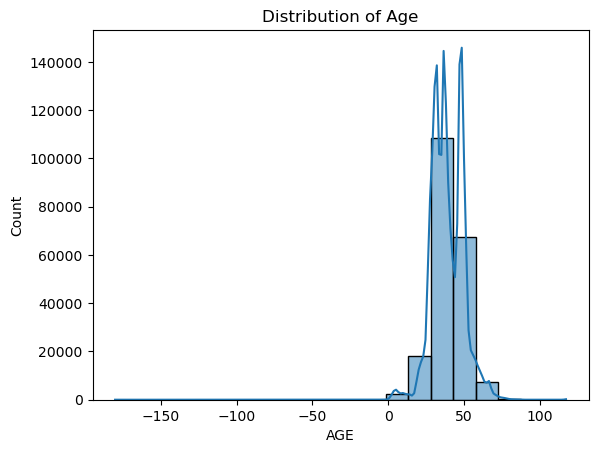

In [35]:
sns.histplot(frequency['AGE'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

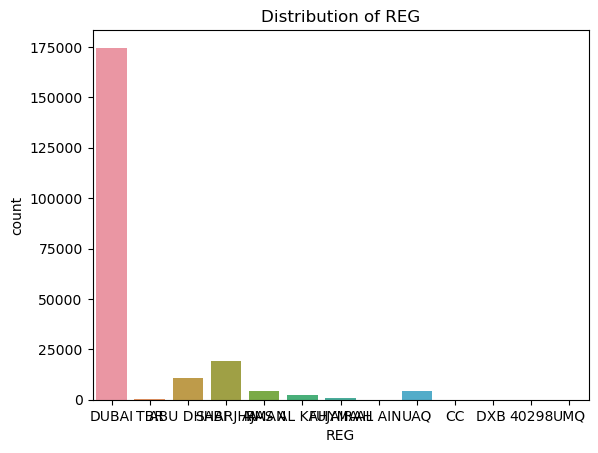

In [36]:
sns.countplot(x='REG', data=frequency)
plt.title('Distribution of REG')
plt.show()

c:\Users\Charbel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


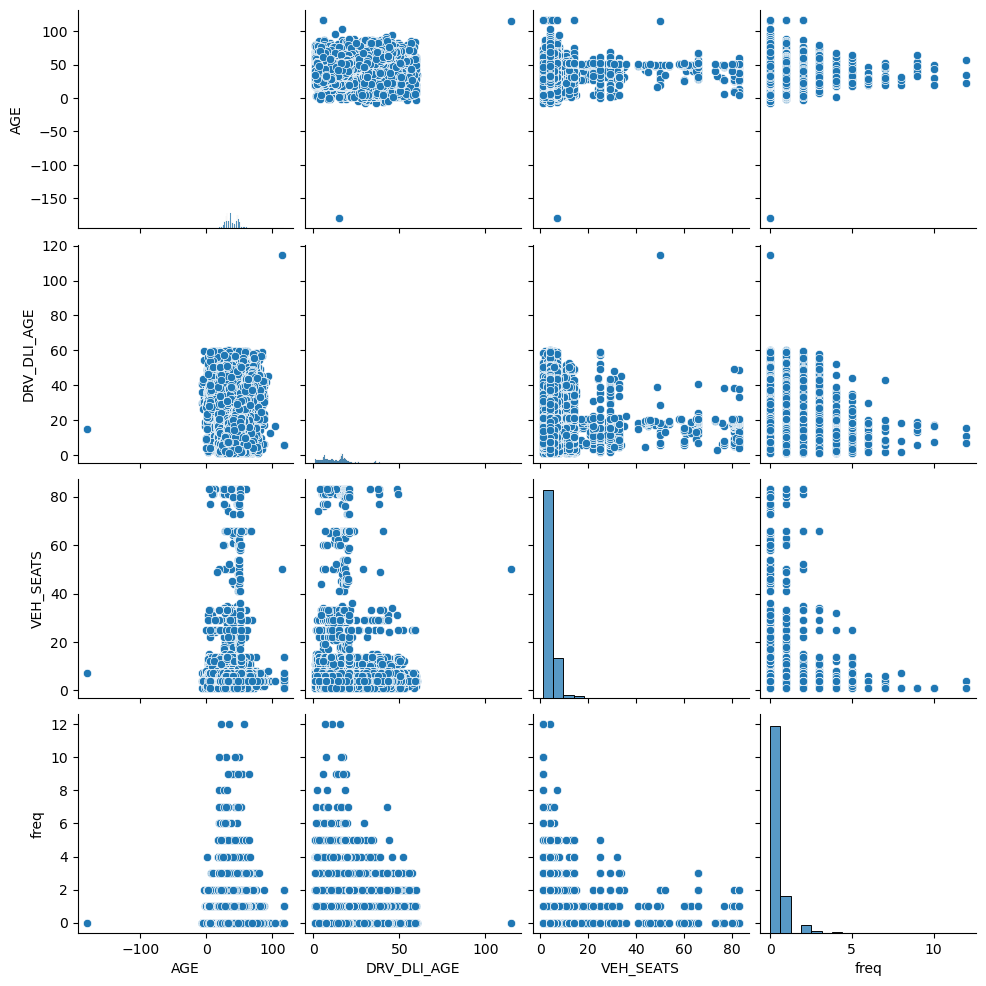

In [37]:
sns.pairplot(frequency[['AGE', 'DRV_DLI_AGE', 'VEH_SEATS', 'freq']])
plt.show()

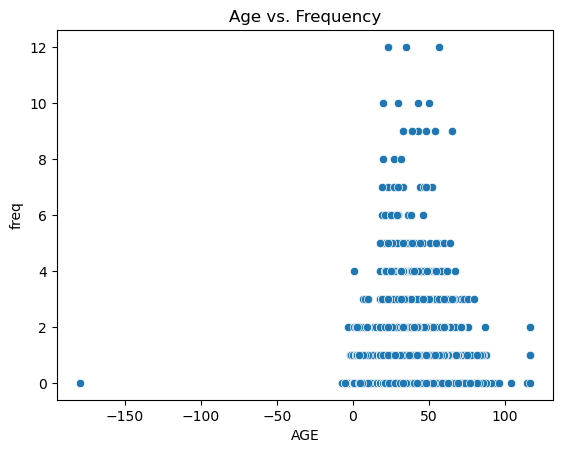

In [38]:
sns.scatterplot(x='AGE', y='freq', data=frequency)
plt.title('Age vs. Frequency')
plt.show()

In [39]:
encoder = LabelEncoder()
encoderColumns = ['REG', 'BODY', 'MAKE']
for i in encoderColumns:
    frequency[i] = encoder.fit_transform(frequency[i])
frequency

,AGE,REG,DRV_DLI_AGE,BODY,MAKE,VEH_SEATS,freq
0,26.0,5,8.022349,49,187,4.0,2
4,NaN,5,NaN,35,135,2.0,0
5,NaN,5,NaN,49,187,4.0,0
6,50.0,5,17.602834,75,84,8.0,1
7,26.0,5,8.022349,49,135,4.0,1
...,...,...,...,...,...,...,...
235128,42.0,1,14.592745,60,143,4.0,0
235129,69.0,5,37.264887,49,16,4.0,0
235130,35.0,5,7.624914,49,30,4.0,0
235131,48.0,1,3.137577,49,187,4.0,0


In [40]:
frequency[frequency.AGE<18].count()

AGE            2940
REG            2940
DRV_DLI_AGE    2940
BODY           2940
MAKE           2940
VEH_SEATS      2940
freq           2940
dtype: int64

In [41]:
frequency[frequency.AGE>90].count()

AGE            37
REG            37
DRV_DLI_AGE    37
BODY           37
MAKE           37
VEH_SEATS      37
freq           37
dtype: int64

In [42]:
frequency.AGE.isna().sum()

12038